In [27]:
#여기 코드가 가장 중요하다. 위의 코드를 사용하면 matplot창을 띄워주고
# 아래의 코드를 사용하면 파이썬에서 첫번째 이미지만 보여준다.


#%matplotlib qt

%matplotlib inline

In [1]:
#모델
import tensorflow as tf
import os

def download_model(model_type):
    server_prefix = 'https://omnomnom.vision.rwth-aachen.de/data/metrabs'
    model_zippath = tf.keras.utils.get_file(
        origin=f'{server_prefix}/{model_type}_20211019.zip',
        extract=True, cache_subdir='models')
    model_path = os.path.join(os.path.dirname(model_zippath), model_type)
    return model_path

model = tf.saved_model.load(download_model('metrabs_mob3l_y4t')) # or metrabs_eff2l_y4 for the big model
! wget -q https://raw.githubusercontent.com/isarandi/metrabs/master/img/test_image_3dpw.jpg

#이미지
import cv2
image = cv2.imread('C:/Users/Leeyourack/jookyoung/image/1.test_image/peo3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

'wget'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [4]:
#예측
pred = model.detect_poses(image, skeleton='smpl_24')

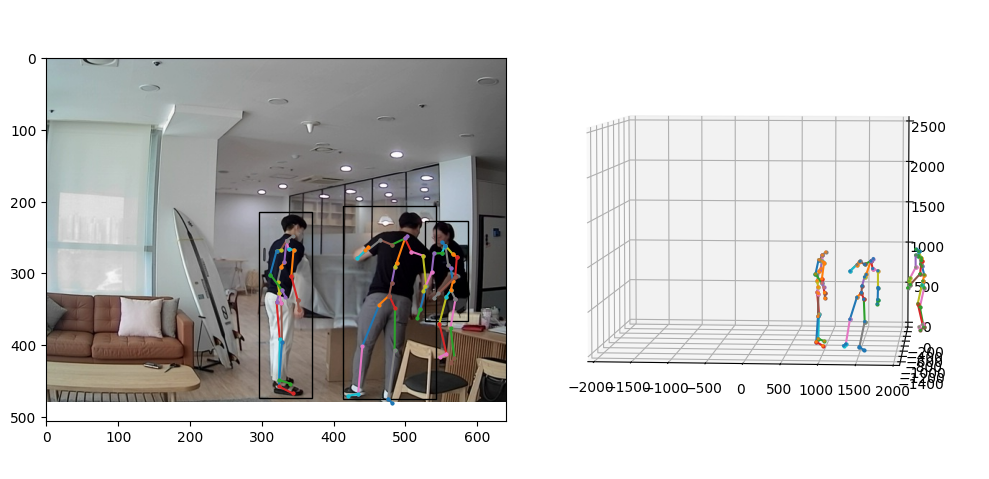

In [28]:
#2D, 3D skeleton 띄우기

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d import Axes3D

def visualize(im, detections, poses3d, poses2d, edges):
    fig = plt.figure(figsize=(10, 5.2))
    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image)
    for x, y, w, h in detections[:, :4]:
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -85)
    pose_ax.set_xlim3d(-2000, 2000)
    pose_ax.set_zlim3d(0, 2500)
    pose_ax.set_ylim3d(-1500,0)

    # Matplotlib plots the Z axis as vertical, but our poses have Y as the vertical axis.
    # Therefore, we do a 90° rotation around the X axis:
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, poses2d):
        for i_start, i_end in edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

    fig.tight_layout()
    plt.show()

visualize(
    image, 
    pred['boxes'].numpy(),
    pred['poses3d'].numpy(),
    pred['poses2d'].numpy(),
    model.per_skeleton_joint_edges['smpl_24'].numpy())

직접 만들어보자


In [29]:
edges = model.per_skeleton_joint_edges['smpl_24'].numpy()
poses3d = pred['poses3d'].numpy()
poses2d = pred['poses2d'].numpy()


# 찾은pose3d의 y축이 matplot의 z축이 되어야한다.

poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]


In [47]:
poses3d[0]

array([[  951.1    ,  3711.6    ,  -547.4    ],
       [  865.9    ,  3705.6    ,  -624.     ],
       [  997.5    ,  3700.4    ,  -649.8    ],
       [  965.2    ,  3682.     ,  -435.15   ],
       [  730.4    ,  3742.     ,  -980.3    ],
       [ 1008.7    ,  3756.4    , -1020.3    ],
       [ 1005.1    ,  3733.6    ,  -306.05   ],
       [  673.4    ,  3616.8    , -1340.4    ],
       [  924.4    ,  3644.4    , -1388.8    ],
       [ 1030.7    ,  3777.2    ,  -276.05   ],
       [  610.1    ,  3753.6    , -1406.2    ],
       [  990.6    ,  3763.6    , -1474.6    ],
       [ 1113.4    ,  3814.8    ,   -69.175  ],
       [  995.2    ,  3803.2    ,  -123.1    ],
       [ 1155.2    ,  3772.8    ,  -180.975  ],
       [ 1152.8    ,  3882.4    ,   -45.81875],
       [  906.1    ,  3835.6    ,   -83.3    ],
       [ 1254.4    ,  3768.8    ,  -214.35   ],
       [  712.1    ,  3871.2    ,  -246.125  ],
       [ 1263.6    ,  3705.6    ,  -462.65   ],
       [  821.7    ,  4054.4    ,  -179.

In [45]:
poses3d[0].T #전치 해주자 이유는 다 음코드에

array([[  951.1    ,   865.9    ,   997.5    ,   965.2    ,   730.4    ,
         1008.7    ,  1005.1    ,   673.4    ,   924.4    ,  1030.7    ,
          610.1    ,   990.6    ,  1113.4    ,   995.2    ,  1155.2    ,
         1152.8    ,   906.1    ,  1254.4    ,   712.1    ,  1263.6    ,
          821.7    ,  1249.2    ,   861.4    ,  1238.2    ],
       [ 3711.6    ,  3705.6    ,  3700.4    ,  3682.     ,  3742.     ,
         3756.4    ,  3733.6    ,  3616.8    ,  3644.4    ,  3777.2    ,
         3753.6    ,  3763.6    ,  3814.8    ,  3803.2    ,  3772.8    ,
         3882.4    ,  3835.6    ,  3768.8    ,  3871.2    ,  3705.6    ,
         4054.4    ,  3820.4    ,  4115.2    ,  3860.4    ],
       [ -547.4    ,  -624.     ,  -649.8    ,  -435.15   ,  -980.3    ,
        -1020.3    ,  -306.05   , -1340.4    , -1388.8    ,  -276.05   ,
        -1406.2    , -1474.6    ,   -69.175  ,  -123.1    ,  -180.975  ,
          -45.81875,   -83.3    ,  -214.35   ,  -246.125  ,  -462.65   ,
  

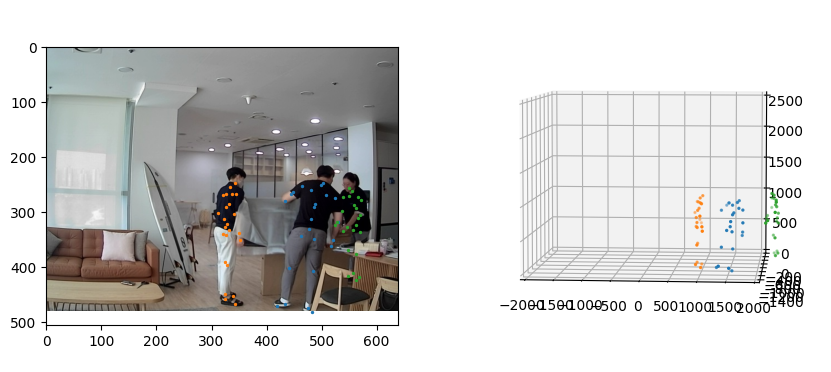

In [30]:
fig = plt.figure(figsize=(10, 5.2))
image_ax = fig.add_subplot(1, 2, 1)
image_ax.imshow(image)

pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
pose_ax.view_init(5, -85)
pose_ax.set_xlim3d(-2000, 2000)
pose_ax.set_zlim3d(0, 2500)
pose_ax.set_ylim3d(-1500,0)
# zip 함수를 사용해 병렬처리가능(아주 좋은 기능 for문을 한 번 돌려도 된다.)
for pose3d, pose2d in zip(poses3d, poses2d):
        
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

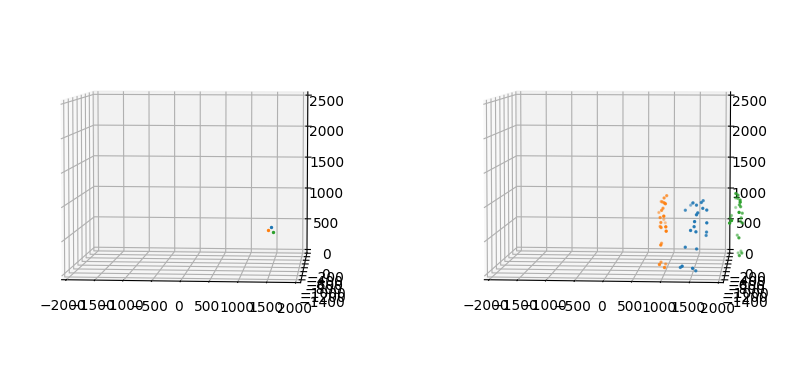

In [31]:
fig = plt.figure(figsize=(10, 5.2))
image_ax = fig.add_subplot(1, 2, 1, projection='3d')
image_ax.view_init(5, -85)
image_ax.set_xlim3d(-2000, 2000)
image_ax.set_zlim3d(0, 2500)
image_ax.set_ylim3d(-1500,0)
image_ax.scatter(951.1 ,  3711.6 , -547.4, s=2)
image_ax.scatter(865.9 ,  3705.6 , -624, s=2)
image_ax.scatter(997.5 ,  3700.4 , -649.8 , s=2)


pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
pose_ax.view_init(5, -85)
pose_ax.set_xlim3d(-2000, 2000)
pose_ax.set_zlim3d(0, 2500)
pose_ax.set_ylim3d(-1500,0)

for pose3d in poses3d :
        
        
        pose_ax.scatter(*pose3d.T, s=2)

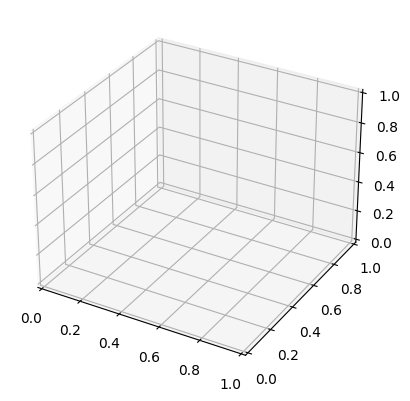

In [32]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')


In [33]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(fig)

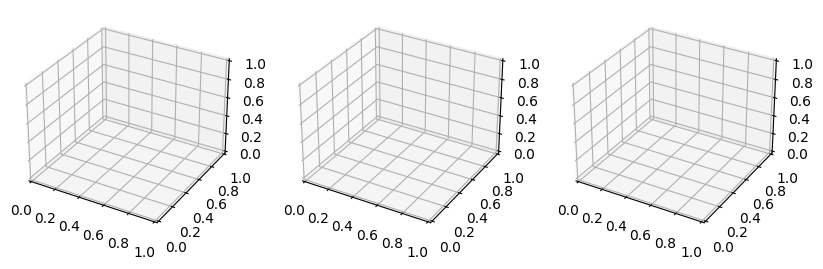

In [34]:
fig = plt.figure(figsize=(10, 3))
ax0 = fig.add_subplot(131, projection="3d")
ax1 = fig.add_subplot(132, projection="3d")
ax2 = fig.add_subplot(133, projection="3d")

In [22]:
#위와 같은 코드
fig, axs = plt.subplots(ncols=3, figsize=(10, 3), 
                        subplot_kw={"projection":"3d"})

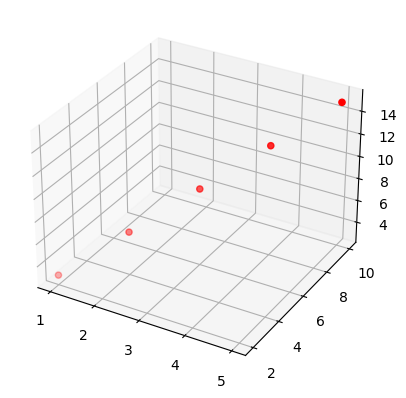

In [35]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax =  fig.add_subplot(111,projection = '3d')

x = [1,2,3,4,5]
y = [2,4,6,8,10]
z = [3,6,9,12,15]

ax.scatter(x,y,z, c='r', marker = 'o')

plt.show()

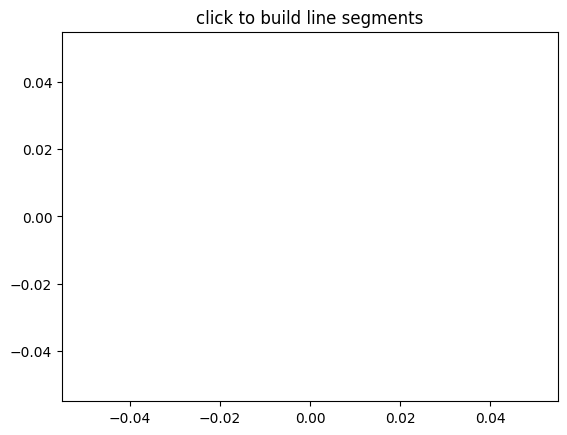

In [36]:
# 선 이어그리도록 만들기


from matplotlib import pyplot as plt

class LineBuilder:
    def __init__(self, line):
        self.line = line
        self.xs = list(line.get_xdata())
        self.ys = list(line.get_ydata())
        self.cid = line.figure.canvas.mpl_connect('button_press_event', self)

    def __call__(self, event):
        print('click', event)
        if event.inaxes!=self.line.axes: return
        self.xs.append(event.xdata)
        self.ys.append(event.ydata)
        self.line.set_data(self.xs, self.ys)
        self.line.figure.canvas.draw()

fig, ax = plt.subplots()
ax.set_title('click to build line segments')
line, = ax.plot([0], [0])  # empty line
linebuilder = LineBuilder(line)

plt.show()

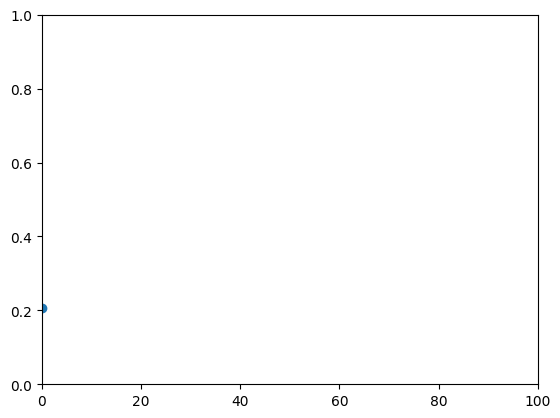

MovieWriter PillowWriter unavailable; using Pillow instead.


In [39]:
# animation 만들기
from matplotlib import pyplot as plt
from celluloid import Camera
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# create figure object
fig = plt.figure()
# load axis box
ax = plt.axes()
# set axis limit
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)

camera = Camera(fig)
for i in range(100):
    ax.scatter(i, np.random.random())
    plt.pause(0.1)
    camera.snap()

animation = camera.animate()
animation.save('ani.gif', writer='PillowWriter', fps=2)